### 스파크 윈도우용 설치 후

In [2]:
import findspark
import os
findspark.init()

import pyspark
try:
    sc = pyspark.SparkContext()
except:
    pass

lines = sc.textFile("C://spark-2.4.1-bin-hadoop2.7/README.md")
lines_nonempty = lines.filter( lambda x:len(x) > 0)
lines_nonempty.count()


65

In [12]:
rdd = sc.parallelize([1,2,3,3])
sorted(rdd.map(lambda x:(x,x*x)).collect())

[(1, 1), (2, 4), (3, 9), (3, 9)]

In [15]:
rdd = sc.parallelize([1,2,3,3])
rdd.flatMap(lambda x:range(1,x)).collect()

[1, 1, 2, 1, 2]

In [17]:
rdd.filter(lambda x:x%2==0).collect()

[2]

In [20]:
rdd.distinct().collect()

[1, 2, 3]

In [23]:
rdd.sample(False, 0.5, 1).collect()

[3]

In [26]:
other = sc.parallelize([3,4,5])
rdd.union(other).collect()

[1, 2, 3, 3, 3, 4, 5]

In [28]:
rdd.intersection(other).collect()

[3]

In [30]:
rdd.subtract(other).collect()

[1, 2]

In [61]:
rdd.cartesian(other).collect()

[(1, 3),
 (1, 4),
 (1, 5),
 (2, 3),
 (2, 4),
 (2, 5),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 3),
 (3, 4),
 (3, 5)]

In [62]:
rdd.takeOrdered(2, key = lambda x: -x)

[3, 3]

In [63]:
ll = [1,2,3,4]
#ll.reverse()
ll.sort(key=lambda x: x%2)
ll


[2, 4, 1, 3]

In [67]:
rdd.takeSample(True,2)

[1, 2]

In [69]:
rdd.takeSample(False,2)

[1, 2]

In [71]:
rdd.reduce(lambda x,y: x+y)

9

In [73]:
rdd.fold(2, lambda x,y: x+ y)

27

In [77]:
seqOp = (lambda x,y: (x[0]+y, x[1]+1))
combOp = (lambda x, y: (x[0]+ y[0], x[1]+y[1]))
rdd.aggregate((0,0), seqOp, combOp)

(9, 4)

In [79]:
def f(x): print(x)
rdd.foreach(f)


#### jupyter notebook 실행한 cmd화면에서 결과 확인

#  빈줄

###  markdown 연습

### This is **test** *test* [link](http://hellowork.com), equations:
$$\hat{f}(\xi) = \int_{-\infty}^{+\infty} f(x) \, \mathrm{e}^{-i \xi x}dx$$

code with syntax highlighting:
```python
    print("Hello world!")
```
    
and images:
![This is an image](http://ipython.org/_static/IPy_header.png)

# Spark 예제 따라하기

In [1]:
%%writefile  "ex1.py"
from __future__ import print_function
import sys
from operator import add
from pyspark.sql import SparkSession
import pyspark

if __name__ == '__main__':
    spark = SparkSession.builder.appName("PythonWordCount").getOrCreate()
    
    line = spark.read.text("C://spark-2.4.1-bin-hadoop2.7/README.md").rdd.map(lambda x: x[0])
    
    count = lines.flatMap(lambda x: x.split(' ')).map(lambda x: (x,1)).reduceByKey(add)
    
    output = count.collect()
    #output = count.sortByKey().collect() #(count.count(), key=lambda x,y:(y))
    for (word, count) in output:
        print("%s : %i " % (word, count))
        
    spark.stop()

Overwriting ex1.py


In [3]:
!ex1.py

Traceback (most recent call last):
  File "C:\dk\ex1.py", line 4, in <module>
    from pyspark.sql import SparkSession
ModuleNotFoundError: No module named 'pyspark'



# 그래프 처리 라이브러리

Populating the interactive namespace from numpy and matplotlib


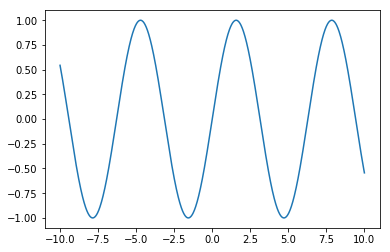

In [8]:
%pylab inline
x = linspace(-10., 10, 1000)
plot(x,sin(x))

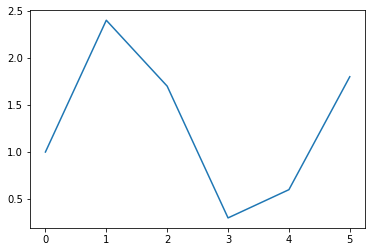

In [12]:
from pylab import *
y = [1., 2.4 , 1.7, 0.3, 0.6 , 1.8]
plot(y)
show()

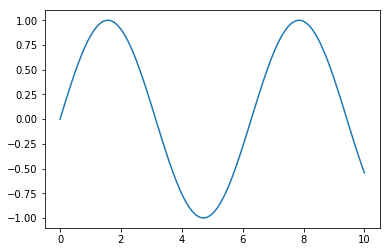

In [13]:
from pylab import plot, show
from numpy import linspace, sin
x = linspace(0,10,100)
y = sin(x)
plot(x,y)

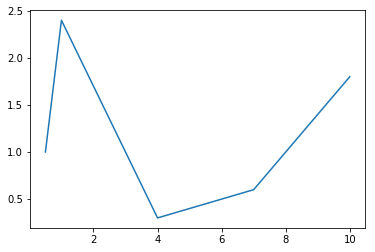

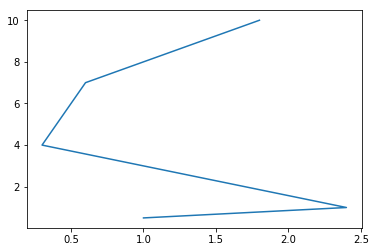

In [20]:
from pylab import *
x = [0.5, 1.0, 2.0, 4.0 , 7.0, 10.0]
y = [1., 2.4 , 1.7, 0.3, 0.6 , 1.8]

plot(x,y)
show()
plot(y,x)
show()

In [47]:
import numpy as np
cnt = 0
x = [0.5, 1.0, 2.0, 4.0 , 7.0, 10.0]
y = [1., 2.4 , 1.7, 0.3, 0.6 , 1.8]

with open("values.txt","w") as f:
    for a in x:
        f.write("{0} {1}\n".format(a,y[cnt]))
        cnt= cnt +1

[[ 0.5  1. ]
 [ 1.   2.4]
 [ 2.   1.7]
 [ 4.   0.3]
 [ 7.   0.6]
 [10.   1.8]]


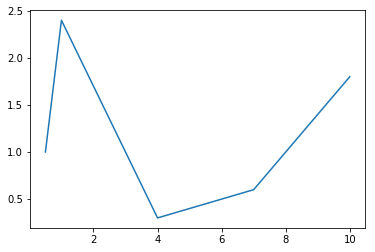

In [65]:
import numpy as np
a = np.loadtxt("values.txt",float)
x = a[:,0]
y = a[:,1]
print(a)
plot(x,y)
    

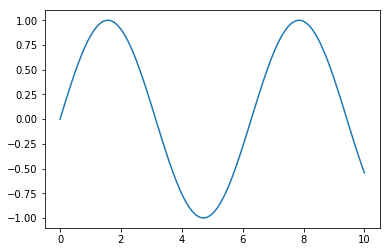

In [56]:
xp = []
yp = []
for x in linspace(0,10,100):
    xp.append(x)
    yp.append(sin(x))
plot(xp,yp)

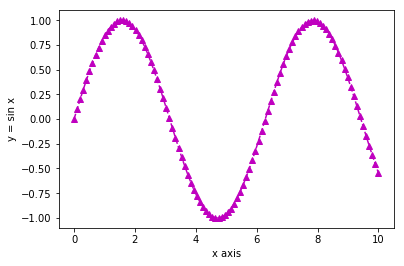

In [91]:
from pylab import plot, show
from numpy import linspace, sin
x = linspace(0,10,100)
y = sin(x)
plot(x,y,"m^--")
ylim(-1.1,1.1)
xlabel("x axis")
ylabel("y = sin x")
show()

In [6]:
import numpy as np
from pylab import plot, show
sunspot = np.loadtxt("sunspots.txt", float)

x = sunspot[:,0]
y = sunspot[:,1]
plot(x,y)

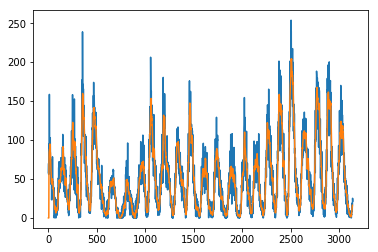

In [32]:
k = 10
d = sum(sunspot[0:k,1])
z = []
for i in range(5): 
    z.append(0)
z.append(d/10)
#sum(sunspot[0:1])
#print(sunspot[0:10,1])
for i in range(k, len(sunspot)):
    z.append(sum(sunspot[i-k:i,1])/10)
plot(x,y,z)


In [ ]:
def ma(inter, win):
    wi = 

### 어제에 이어서 (3일차)

3143 3143 3139


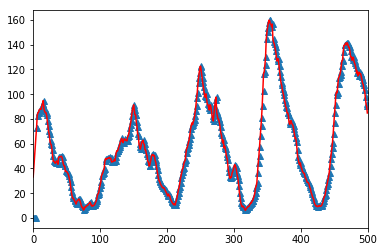

In [53]:
from pylab import *
def movingaverage(intrv, win):
    window = np.ones(int(win))/float(win)
    return np.convolve(intrv,window, 'same')
disp = 500
x = sunspot[:,0]
y = sunspot[:,1]
print(len(x), len(y), len(z))
plot(x[:disp],z[:disp],"^")
y_av = movingaverage(y,10)
plot(x[:disp],y_av[:disp],"r")
xlim(0,disp)
show()

    

In [57]:
import numpy as np
np.ones(int(10))/10

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])